In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [2]:
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir
from geo_tool import Point_Cloud

from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from tf_lab.iclr.helper import load_multiple_version_of_pcs

In [24]:
from tf_lab.gans.vanilla_gan import Vanilla_GAN
from tf_lab.gans.w_gan_gp import W_GAN_GP

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator,\
point_cloud_generator, leaky_relu

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
save_model = False
do_training = True
plot_train_curve = True
max_epochs = 2000
save_syn_step = 100
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), 
                                    np.arange(save_syn_step, max_epochs + 1, 
                                              save_syn_step)])
do_wgan = True

In [11]:
if do_wgan:
    gan_tag = 'r_w_gan'
else:
    gan_tag = 'r_gan'

In [12]:
class_name = 'chair'
# = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples_new/r_gan/'

In [17]:
n_pc_points = 2048
beta = 0.5

discriminator = mlp_discriminator
generator = point_cloud_generator
gen_kwargs = {'b_norm': [False]}

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
init_lr = 0.0001


if do_wgan:
    arch_tag = 'mlp_pc_gen_default'
    disc_kwargs = {'b_norm': [False]}
else:    
    arch_tag = 'mlp_pc_gen_default_leak_20'
    leak = 0.2
    disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': [False]}


n_output = [n_pc_points, 3]
experiment_name = '_'.join([class_name, arch_tag, gan_tag, str(n_pc_points) + '_pts'])

In [14]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
training_data = in_data['train']
n_syn_samples = training_data.num_examples  # Same number as original GT data.

679 pclouds were loaded. They belong in 1 shape-classes.
5761 pclouds were loaded. They belong in 1 shape-classes.
338 pclouds were loaded. They belong in 1 shape-classes.


In [25]:
reset_tf_graph()

if do_wgan:
    lam = 10
    gan = W_GAN_GP(experiment_name, init_lr, lam, n_output, noise_dim,
                    discriminator, generator,
                    disc_kwargs=disc_kwargs, beta=beta)
    
else:    
    gan = Vanilla_GAN(experiment_name, init_lr, n_output, noise_dim,
                 discriminator, generator, beta=beta, 
                 gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (-0.0373581200838089, -0.1585784779770462) 32.3932471275


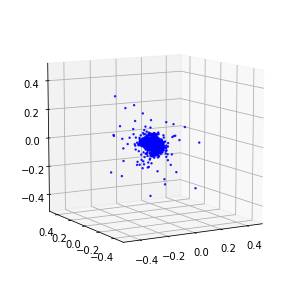

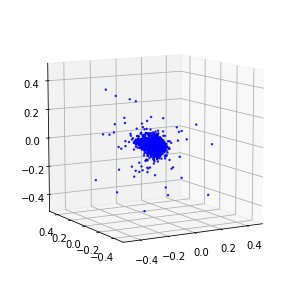

2 (-0.14820101403671762, 0.5893679343811844) 32.890155077
3 (-0.249262080633122, 0.36350243635799573) 34.2853429317
4 (-0.2840147155782451, 0.588977979577106) 33.8380348682
5 (-0.27555544855801956, 0.6310396298118259) 31.6745569706


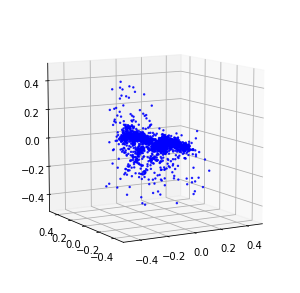

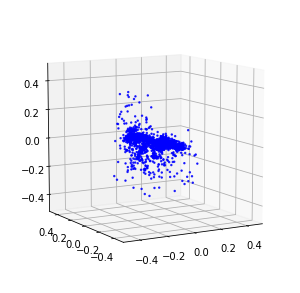

6 (-0.29129092822904173, 0.6310054141542186) 31.9148640633
7 (-0.3010440459717875, 0.6790632061336351) 33.3941941261
8 (-0.303334137926931, 0.6747251749038696) 33.3038699627
9 (-0.2866784899131111, 0.7361388634080472) 36.7244520187
10 (-0.25369181918061295, 0.7171203286751456) 35.4521150589


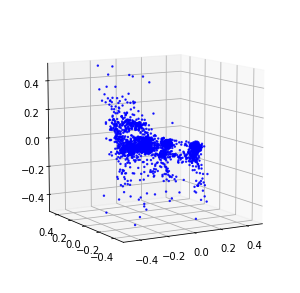

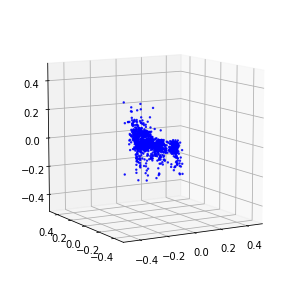

11 (-0.17295399223980695, 0.7378139016420945) 32.2931268215
12 (-0.16618072469921216, 0.8484121593444244) 33.5448958874
13 (-0.14953979674888693, 0.862100469029468) 33.8226950169
14 (-0.18377773975548536, 0.9412711081297501) 34.7585849762
15 (-0.2055044412612915, 1.0883464243101038) 34.1988577843
16 (-0.2199004529610924, 1.1849905356116917) 33.5921349525
17 (-0.2112028243749038, 1.2633791436319766) 33.8272008896
18 (-0.19687608013982358, 1.2934261197629182) 34.7236359119
19 (-0.1938706558683644, 1.314757694368777) 46.9590640068
20 (-0.18162627893945446, 1.2923074079596477) 40.672837019
21 (-0.17398390251657236, 1.2672607328580774) 38.1640841961
22 (-0.17298899105061655, 1.1982968527337778) 42.2081511021
23 (-0.17574496923581415, 1.2275758463403452) 38.0612740517
24 (-0.17013378311758456, 1.2252482849618662) 41.6341290474
25 (-0.16985160701948662, 1.1721093447312065) 43.1452219486
26 (-0.16556614825259083, 1.1537323205367378) 38.8642599583
27 (-0.1619225255821062, 1.1164683673692786) 35

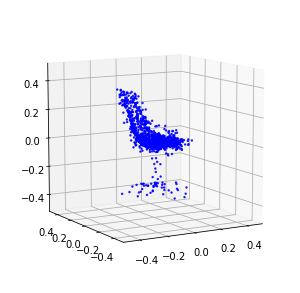

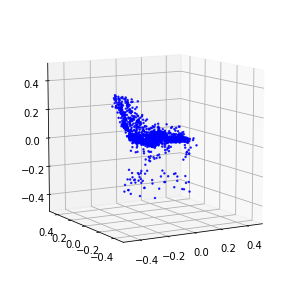

101 (-0.07975062575677166, 0.44299168301665265) 49.8252210617
102 (-0.08113957254782966, 0.4761828572853752) 49.062582016
103 (-0.0810346199442511, 0.4735102821951327) 49.2537748814
104 (-0.0765069478555866, 0.4752198120822077) 49.1800730228
105 (-0.08006506623781245, 0.47268753336823505) 33.0281829834
106 (-0.07507068900310475, 0.44670143593912537) 23.9240670204
107 (-0.07793771141897077, 0.4758997144906417) 23.6846511364
108 (-0.0746012670190438, 0.44164507414983667) 32.4827389717
109 (-0.07499421906212102, 0.42205623375332874) 24.4452030659
110 (-0.07655125046553819, 0.4417947647364243) 46.3986020088
111 (-0.07618559833777988, 0.4600822497969088) 26.5113661289
112 (-0.07577670015718625, 0.40009562995122827) 29.4723508358
113 (-0.0738538154117439, 0.4109918941622195) 25.2470841408
114 (-0.07583614500320476, 0.4252560099829798) 54.202203989
115 (-0.07565279261249563, 0.4037630039712657) 49.0010311604
116 (-0.0749403306323549, 0.4282461599163387) 43.7239649296
117 (-0.0733218223342429,

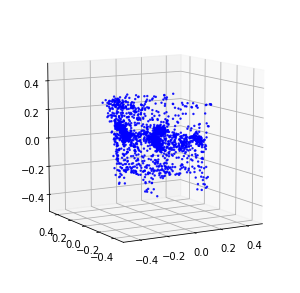

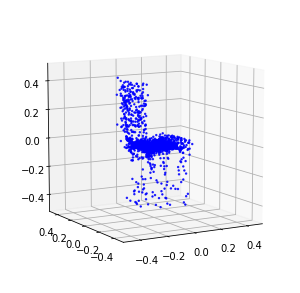

201 (-0.05764170221012572, 0.19843819543071414) 45.9213819504
202 (-0.05877681066808493, 0.21628960643125617) 47.3943889141
203 (-0.05948037351279155, 0.19954324189735495) 48.6204180717
204 (-0.05790338357505591, 0.19306550336920697) 47.6123549938
205 (-0.05803136051349018, 0.2376645460076954) 48.3903791904
206 (-0.05783617528884307, 0.2463101090296455) 48.2935018539
207 (-0.05743388462325801, 0.2214409109690915) 48.1558508873
208 (-0.05852654417571814, 0.22736239886802176) 47.4039268494
209 (-0.05760376422625521, 0.22111693542936575) 47.5388069153
210 (-0.057728491318614586, 0.21649783137051956) 49.6779830456
211 (-0.05709859421071799, 0.22189336917970492) 47.1915640831
212 (-0.058362433111862, 0.20284519117811453) 47.9773950577
213 (-0.05532327653921169, 0.22963003133950027) 47.1918849945
214 (-0.05571322863840539, 0.23115668802157693) 48.4557468891
215 (-0.05725240532470786, 0.2112323019815528) 47.9235141277
216 (-0.05583105326994606, 0.2200626024733419) 49.8896381855
217 (-0.057172

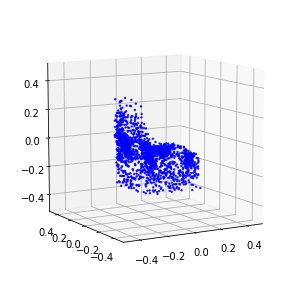

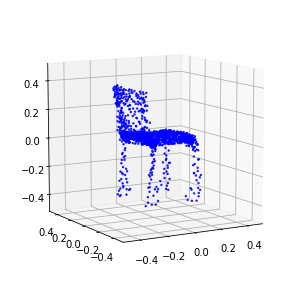

301 (-0.04926228345088337, 0.16895396748314734) 49.3964772224
302 (-0.04756792378814324, 0.1778065513657487) 48.5728030205
303 (-0.05037003713457481, 0.17942392955655637) 50.133589983
304 (-0.04961856616579968, 0.16639686213887256) 50.586274147
305 (-0.04713954450967519, 0.18709158832612244) 49.379734993
306 (-0.04957802349134632, 0.18675430637338888) 49.167509079
307 (-0.04902318042257558, 0.18087348244760348) 47.6929249763
308 (-0.04948458501502224, 0.1938943451513415) 49.9703190327
309 (-0.04894581309155278, 0.19736061990261078) 49.4905049801
310 (-0.04701135181214498, 0.16530088724001593) 49.434278965
311 (-0.050215376055111054, 0.1899303933200629) 50.3613278866
312 (-0.04852127239270055, 0.20068240748799365) 49.0227649212
313 (-0.0480556008770414, 0.20402309428090634) 48.646805048
314 (-0.047660859042535655, 0.2135962487562843) 47.9893231392
315 (-0.04945609026143084, 0.20315541391787323) 48.9262180328
316 (-0.048272634686335275, 0.16685674242351367) 47.0429890156
317 (-0.04830701

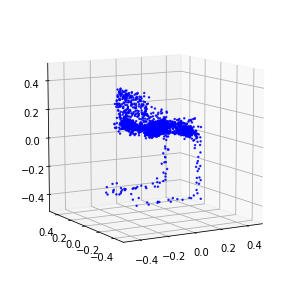

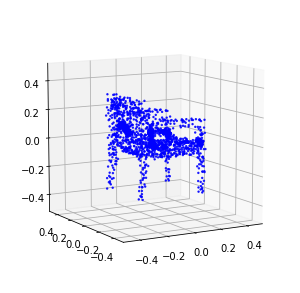

401 (-0.04481103123854036, 0.16335551829441733) 49.3689990044
402 (-0.04160300480282825, 0.14545999111040778) 47.9329679012
403 (-0.04333516239472057, 0.15818147620429163) 49.381221056
404 (-0.04526565640192965, 0.15337620060081067) 48.1338841915
405 (-0.04355618126042511, 0.1663667394415192) 53.0769939423
406 (-0.043554052370397944, 0.17583166386770166) 47.2322528362
407 (-0.04330001044208589, 0.1806366132653278) 48.7903969288
408 (-0.042747590302125264, 0.17856135996787445) 47.2719390392
409 (-0.04221516684831485, 0.18516768191171729) 45.3016729355
410 (-0.042913351062199345, 0.16952109887548114) 47.0652639866
411 (-0.04410160010599572, 0.15355277514976004) 48.5457589626
412 (-0.04220395983885164, 0.17193489294985068) 48.9038369656
413 (-0.042949242322989134, 0.16188537167466205) 47.1924319267
414 (-0.04338768171551435, 0.1788796546018642) 47.2751159668
415 (-0.040932172245305515, 0.16651427486668463) 47.2896900177
416 (-0.042087805263050226, 0.17571227544027826) 49.1949169636
417 (-

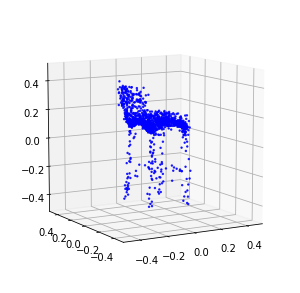

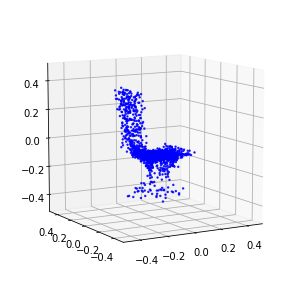

501 (-0.04192511120244213, 0.1914627367387647) 47.7614150047
502 (-0.0403111690412397, 0.1660394927729731) 37.6502599716
503 (-0.04244413464937521, 0.16688762410827304) 50.2085051537
504 (-0.039568899758160116, 0.1740410185378531) 50.5731060505
505 (-0.043210879923856776, 0.19054062081419904) 48.0880589485
506 (-0.03942774817671465, 0.17468127349148627) 47.4696829319
507 (-0.04114125479498635, 0.18968269617661185) 46.5324029922
508 (-0.04061858903454698, 0.1699482134502867) 49.9772319794
509 (-0.039290747386605845, 0.1787631842105285) 47.2839031219
510 (-0.04188939913621415, 0.18115185557500177) 48.9001858234
511 (-0.04089426478452009, 0.1731195171242175) 46.9010620117
512 (-0.041584218204345394, 0.170059685797795) 48.7095088959
513 (-0.039086587986220486, 0.1575450106807377) 47.0977010727
514 (-0.04035018767513659, 0.17320636789435925) 47.7021849155
515 (-0.04015887962735218, 0.178358883637449) 48.2757909298
516 (-0.04058931897515836, 0.16601996512516684) 47.3945839405
517 (-0.0402047

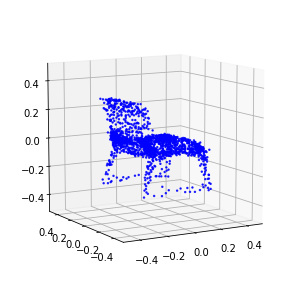

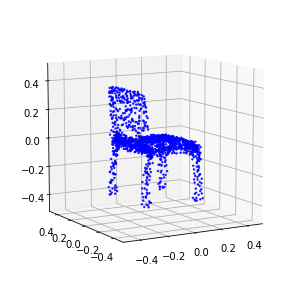

601 (-0.037494109222746416, 0.2033146820638491) 47.6682980061
602 (-0.03793428166081076, 0.16630130585121072) 48.1120870113
603 (-0.037163610383868215, 0.17444333045378976) 47.716520071
604 (-0.038232574247471666, 0.1586726664201073) 47.9136312008
605 (-0.03811730859072312, 0.1489925938455955) 48.3216891289
606 (-0.039635997411349544, 0.15846632809742636) 47.535048008
607 (-0.03916615079278531, 0.14181707961403806) 51.121090889
608 (-0.038237027767235816, 0.16777916868095813) 48.2742011547
609 (-0.03603445281801016, 0.13772897033587747) 47.6653409004
610 (-0.03894939688236817, 0.1562602607452351) 47.8810651302
611 (-0.03933380779850742, 0.14597768385125243) 50.904392004
612 (-0.03673343511055345, 0.14666966899581577) 47.3642129898
613 (-0.03814923630460449, 0.16784150218186172) 48.3962500095
614 (-0.038650560759655804, 0.1606072404462358) 48.3217890263
615 (-0.038378126360476016, 0.1629178673028946) 47.2325270176
616 (-0.039565804916555466, 0.17494776197101758) 45.8785791397
617 (-0.03

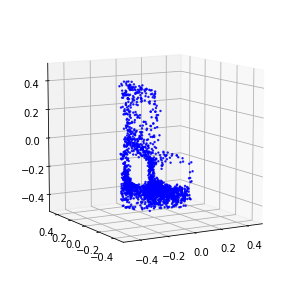

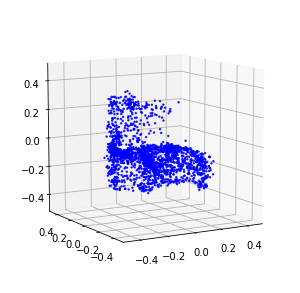

701 (-0.037617269328430944, 0.19004655791365582) 46.9790430069
702 (-0.03811324433949979, 0.18712699348511902) 47.2902891636
703 (-0.03432463239068571, 0.19288948307866635) 47.1868610382
704 (-0.03644263487633156, 0.19406297478986823) 47.2523257732
705 (-0.03596557799078848, 0.17959530748750852) 51.6346569061
706 (-0.03595152250288621, 0.18960957779832507) 47.8740701675
707 (-0.03708871683186811, 0.19128062576055527) 47.2751219273
708 (-0.03690071190990832, 0.19786840418110724) 48.9049730301
709 (-0.03649368589824956, 0.17592951525812564) 43.5883541107
710 (-0.03574024240445831, 0.18042589400125586) 40.0281949043
711 (-0.03504077202599982, 0.1817470996276192) 47.4766249657
712 (-0.03810715223460094, 0.20366938185432684) 47.1083688736
713 (-0.036045559771035025, 0.18001177777414737) 47.149296999
714 (-0.036760119016727676, 0.1898309248297111) 47.3528060913
715 (-0.035276962719533754, 0.20530544610127158) 50.3200569153
716 (-0.036325859140766706, 0.18535047121669934) 47.9799489975
717 (-

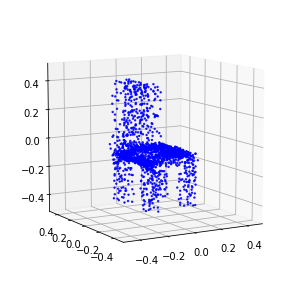

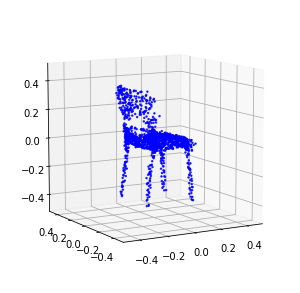

801 (-0.03677906381857136, 0.25296575997186743) 46.9428138733
802 (-0.03387830318964046, 0.253057480506275) 47.3425400257
803 (-0.034755450454743014, 0.22057447290938834) 50.0101537704
804 (-0.03533572850182005, 0.22395643721456113) 48.0926439762
805 (-0.03554158064982166, 0.22468657564857733) 48.3094689846
806 (-0.03284187992305859, 0.21234118938446045) 48.0895438194
807 (-0.03444887997339601, 0.202036596186783) 48.867816925
808 (-0.0320165385775592, 0.20742685963278232) 47.9590420723
809 (-0.03306451609925083, 0.21534847630106885) 48.1888699532
810 (-0.03351661089159872, 0.22157239719577457) 47.3452019691
811 (-0.034420433259852556, 0.21549518373997315) 53.9181888103
812 (-0.03553162247914335, 0.18276751268169153) 47.183150053
813 (-0.033671355692912706, 0.21274302413930063) 49.6104779243
814 (-0.03226125624192797, 0.1868711049142091) 47.9474880695
815 (-0.03466695338973533, 0.2168115636576777) 51.6025309563
816 (-0.03479066849078821, 0.21660466362600742) 49.3672850132
817 (-0.035097

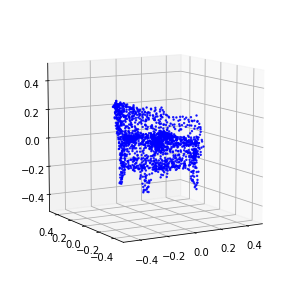

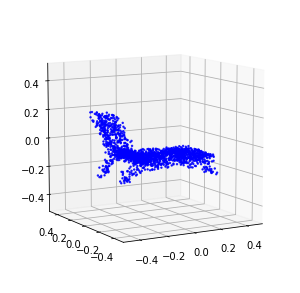

901 (-0.034996110662494015, 0.2634366200022075) 48.2927629948
902 (-0.03202738730317872, 0.2381454524786576) 47.539853096
903 (-0.03438571812180073, 0.25726911684741144) 47.360200882
904 (-0.03278130058847044, 0.2591818286025006) 47.4449770451
905 (-0.03386316379613202, 0.27081686970980273) 50.116727829
906 (-0.032879855386588885, 0.27587297753147455) 47.1560850143
907 (-0.03287899040657541, 0.26043911990912066) 50.0588960648
908 (-0.03382218779753084, 0.2212885883839234) 47.737667799
909 (-0.03340375225019196, 0.27582742403382843) 48.376814127
910 (-0.03158281107797571, 0.24895261292872223) 48.4200510979
911 (-0.03151311271054589, 0.24657345984293066) 47.5148909092
912 (-0.03298519966395005, 0.25850461876910663) 53.1821248531
913 (-0.032845749212024, 0.24971834472987964) 46.8296349049
914 (-0.034287549522907836, 0.25740398466587067) 46.367582798
915 (-0.029992909875252972, 0.24939981426881708) 42.0069160461
916 (-0.034126138606149214, 0.2412978559732437) 47.7381742001
917 (-0.03344234

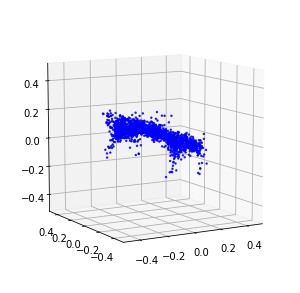

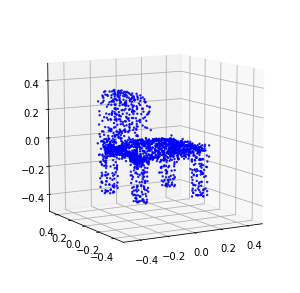

1001 (-0.029168047261950762, 0.26882392362408014) 49.187349081
1002 (-0.030865103889094747, 0.2583351303701815) 47.3877899647
1003 (-0.031913112452172716, 0.2531566425510075) 48.3587799072
1004 (-0.03060155888290509, 0.2891617546910825) 49.388696909
1005 (-0.029463356522762257, 0.2567147936510003) 48.3778479099
1006 (-0.030512942892053852, 0.24569833991320236) 48.4288368225
1007 (-0.030551645961468633, 0.2856785033060157) 47.4251270294
1008 (-0.03118413051833277, 0.25952671468257904) 47.7545049191
1009 (-0.030633098745475644, 0.2773759708456371) 49.1090099812
1010 (-0.029974025909019552, 0.25374525072781934) 48.121131897
1011 (-0.03139987464022377, 0.23607249104458353) 49.9536550045
1012 (-0.030040197430745416, 0.25787412925906805) 50.4334559441
1013 (-0.029286976053338985, 0.26203659500764764) 47.8672289848
1014 (-0.03164179755131836, 0.2806205250646757) 50.0913350582
1015 (-0.031753837390114434, 0.2767210991486259) 52.1451230049
1016 (-0.03070349518371665, 0.2862577490184618) 50.2246

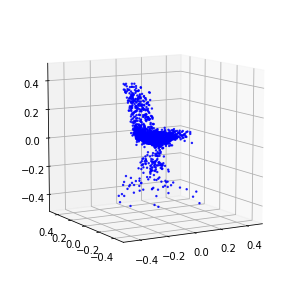

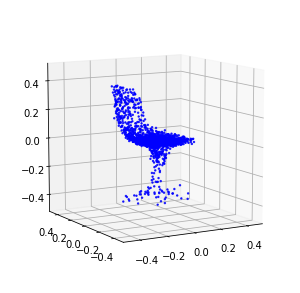

1101 (-0.03178563926206983, 0.2716935264027637) 49.010010004
1102 (-0.02857606410170379, 0.2705494508795116) 49.8917648792
1103 (-0.029468085973159128, 0.2768055304237034) 47.7687671185
1104 (-0.031734233357660145, 0.24217559170463812) 51.3692719936
1105 (-0.02872918544580107, 0.2602097716020501) 47.7614500523
1106 (-0.030258706584572793, 0.2722798702509507) 49.7348558903
1107 (-0.027261509515507067, 0.25751323738823767) 47.3298358917
1108 (-0.027305172885889593, 0.24744996817215628) 49.7415509224
1109 (-0.028964998710738574, 0.28179867889570154) 47.9409301281
1110 (-0.02890447461572678, 0.26841502409914264) 49.1025619507
1111 (-0.03000409604738588, 0.2609853478877441) 47.8273229599
1112 (-0.0295843876655335, 0.2635136991739273) 49.3788840771
1113 (-0.02937173514586428, 0.2481177656546883) 48.9327571392
1114 (-0.02925193317072547, 0.24764616981796597) 50.5043628216
1115 (-0.03166430858976167, 0.2622162375761115) 47.682477951
1116 (-0.02930074978781783, 0.24509852282378985) 46.565233945

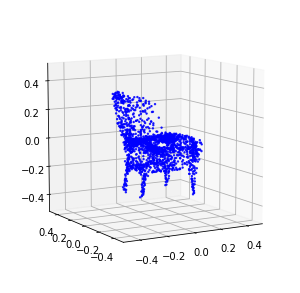

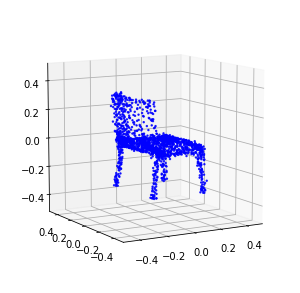

1201 (-0.02919892213590767, 0.26297405232553894) 47.5512471199
1202 (-0.02914195566073708, 0.2847580443257871) 49.8619320393
1203 (-0.02656958299972441, 0.2728339453106341) 49.6758739948
1204 (-0.028306956070920694, 0.2631293502838715) 50.2372720242
1205 (-0.028236825124401115, 0.28172508076481195) 47.3880171776
1206 (-0.029597293605785006, 0.2677807432153951) 45.9410648346
1207 (-0.027453540306052435, 0.2583215392154196) 47.7723040581
1208 (-0.02887324093962493, 0.2868167336868203) 48.0401558876
1209 (-0.028333736332538335, 0.2681063322917275) 47.3652989864
1210 (-0.029513274987592646, 0.2809593781181004) 47.4521160126
1211 (-0.02769757109572706, 0.2732667728610661) 48.1734001637
1212 (-0.02931287533239178, 0.2868300436631493) 48.1829471588
1213 (-0.028946882089518983, 0.2736046197621719) 49.9457299709
1214 (-0.0283320022099044, 0.2837848008974739) 49.5071032047
1215 (-0.028367989372624004, 0.2526784688234329) 49.7859117985
1216 (-0.028114653994207796, 0.28327926993370056) 47.49589991

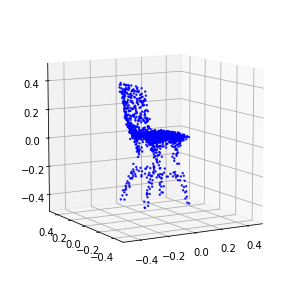

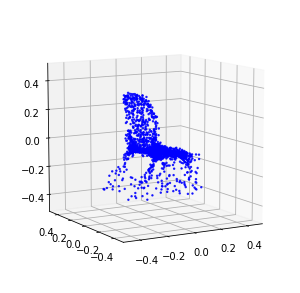

1301 (-0.026423932765812976, 0.2787752805844597) 49.4203510284
1302 (-0.027652730254213446, 0.2673335878745369) 47.8167331219
1303 (-0.028942587469582972, 0.2883519102697787) 51.0079910755
1304 (-0.02736258608005617, 0.2492589095364446) 48.3980739117
1305 (-0.027566253563956075, 0.279470884281656) 50.7922468185
1306 (-0.027398535674032956, 0.2501595402541368) 48.7864170074
1307 (-0.02723699598370687, 0.2585728285105332) 49.0855329037
1308 (-0.028802112117409705, 0.23418999690076578) 49.5340540409
1309 (-0.027675335331941428, 0.26032525300979614) 48.6641359329
1310 (-0.02767961754909028, 0.26434680819511414) 49.9756600857
1311 (-0.02734902478025659, 0.25807197780712793) 48.2863888741
1312 (-0.027180877109260662, 0.2782238164673681) 50.0811297894
1313 (-0.027151680349007896, 0.2730330533307532) 54.4098379612
1314 (-0.02768170300304242, 0.2667381394168605) 47.498705864
1315 (-0.02821333634302668, 0.2711063072733257) 48.2991650105
1316 (-0.027504544174703566, 0.28815040640209033) 50.827962

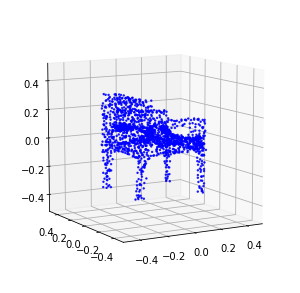

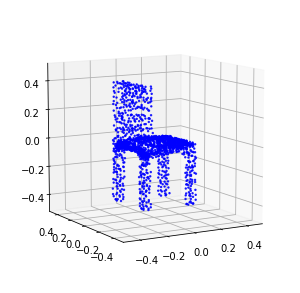

1401 (-0.02603353258708249, 0.2830871168685996) 50.4294228554
1402 (-0.027356405645284965, 0.28073844961498096) 49.982517004
1403 (-0.02685825655479794, 0.28173869265162427) 47.8080821037
1404 (-0.027335623995927365, 0.26802059684110724) 49.0146269798
1405 (-0.028209496180162483, 0.273825541138649) 55.2373161316
1406 (-0.0261346316896379, 0.27817382048005646) 48.3084909916
1407 (-0.026703381684163342, 0.2817464807759161) 47.0064051151
1408 (-0.027092175218074218, 0.28254562810711237) 48.2341470718
1409 (-0.02611992633699075, 0.2539315580025963) 47.683784008
1410 (-0.02644886588677764, 0.2622402679661046) 48.56153512
1411 (-0.025008317909162976, 0.24534197410811548) 48.8317308426
1412 (-0.026638384434677986, 0.28723076568997424) 48.861071825
1413 (-0.02559414300257745, 0.28072911824869073) 48.813035965
1414 (-0.027352897968629133, 0.2904444226752157) 47.6391420364
1415 (-0.027036168567998255, 0.27170770388582477) 50.5040030479
1416 (-0.026298274670768042, 0.2829993030299311) 50.66340279

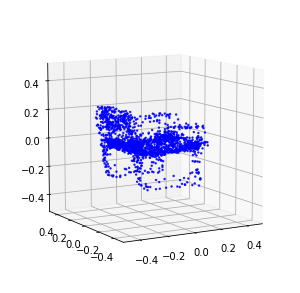

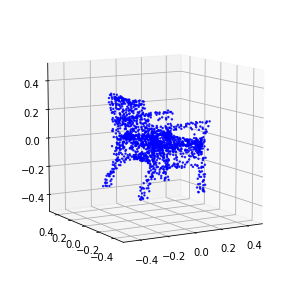

1501 (-0.025833457449208137, 0.28973452941231104) 50.517332077
1502 (-0.025856067272632018, 0.28645912331083545) 47.8581581116
1503 (-0.026594207225286444, 0.2853876488364261) 47.9465332031
1504 (-0.02576652080954417, 0.2835488682207854) 47.92157197
1505 (-0.026569883768325267, 0.2817815568136132) 51.145843029
1506 (-0.026768067965041036, 0.28413475596386456) 47.9354670048
1507 (-0.025651470191128876, 0.2934721345486848) 49.2291228771
1508 (-0.027137343771755695, 0.2759225789619529) 47.8607258797
1509 (-0.02619237419541763, 0.2728727272023325) 53.0522739887
1510 (-0.02607643124444977, 0.28234530272691144) 48.9643719196
1511 (-0.024599045859244856, 0.25472703057786694) 47.8814771175
1512 (-0.02342438535035952, 0.2764519569666489) 48.5584340096
1513 (-0.024799888022243977, 0.2818596803623697) 48.2247731686
1514 (-0.02424871259895356, 0.2692767187305119) 48.8364918232
1515 (-0.024732996073915908, 0.2818745407073394) 48.4165110588
1516 (-0.026657583872261255, 0.29458168667295703) 48.725614

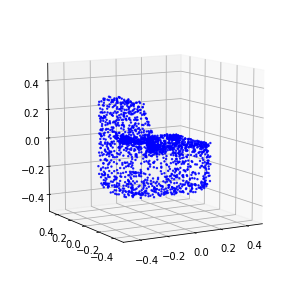

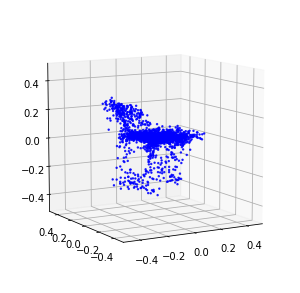

1601 (-0.026168391910260137, 0.2912592887878418) 55.0330350399
1602 (-0.023888184417687034, 0.2848093127426894) 48.4578800201
1603 (-0.02293259321671465, 0.2677846978540006) 46.1666250229
1604 (-0.024844729851769363, 0.2996126581793246) 51.3298130035
1605 (-0.024495343616961138, 0.2925426266763521) 48.7601759434
1606 (-0.025179473658942658, 0.28668176156023273) 48.4529511929
1607 (-0.025342186985780363, 0.27821467233740765) 49.7420129776
1608 (-0.02413955053071613, 0.2795590693536012) 51.2905311584
1609 (-0.024955296390892372, 0.2860213965177536) 47.3308980465
1610 (-0.02519818520497369, 0.2845449201438738) 53.6623120308
1611 (-0.02719933197469167, 0.2748406762662141) 49.1745519638
1612 (-0.023586938979671054, 0.2866631895303726) 53.5150909424
1613 (-0.02525412611582357, 0.28168647379978845) 47.5185441971
1614 (-0.025187506874942263, 0.28463981916075165) 47.4362449646
1615 (-0.026021357022387826, 0.2909906649071237) 49.0216648579
1616 (-0.024586864520350228, 0.2748529327952344) 47.6633

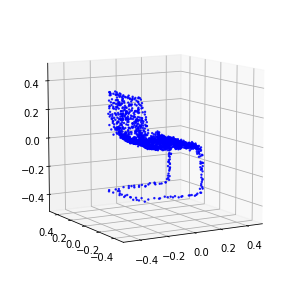

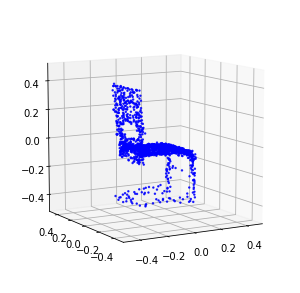

1701 (-0.023670419945341088, 0.2720719977565434) 48.3052167892
1702 (-0.02396212539271168, 0.2848789393901825) 48.4569761753
1703 (-0.0242751047420113, 0.3056022233289221) 48.6957788467
1704 (-0.02517240053123754, 0.2810205059207004) 49.5007021427
1705 (-0.025593265522595332, 0.2874866898940957) 48.3731188774
1706 (-0.026174264052963775, 0.27683135931906494) 47.2989959717
1707 (-0.02415640809289787, 0.2896761784087057) 48.7851040363
1708 (-0.023489942612207455, 0.2858730062194493) 48.2836420536
1709 (-0.024536548307894365, 0.2857951139626296) 48.0774290562
1710 (-0.024462587621224965, 0.27499996838362323) 47.8477711678
1711 (-0.026721056842285654, 0.2675334577975066) 50.2987620831
1712 (-0.023094291458635226, 0.27846009316651715) 48.755453825
1713 (-0.02527458871026402, 0.28995290981686633) 47.8181099892
1714 (-0.02397748510879667, 0.27299680139707483) 48.9039390087
1715 (-0.024246456368785838, 0.2711678341678951) 38.8078320026
1716 (-0.024986549369666888, 0.261668746886046) 49.0206730

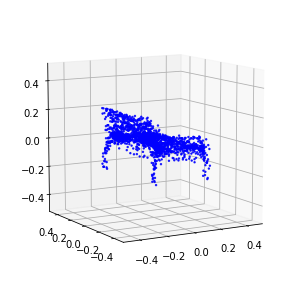

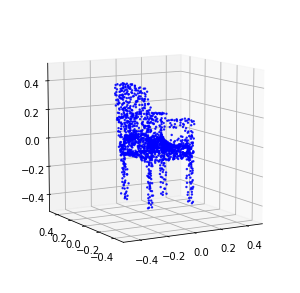

1801 (-0.02282078783635212, 0.2614428446344707) 48.0582721233
1802 (-0.02327478445418503, 0.2606469308552535) 47.9885709286
1803 (-0.021805345906835534, 0.2471635639667511) 51.9552671909
1804 (-0.02243707100658313, 0.2516768250776374) 49.9604029655
1805 (-0.022119656091798907, 0.26042953263158386) 48.6413698196
1806 (-0.022573703414072162, 0.2388448371835377) 50.0836269855
1807 (-0.02402112291234991, 0.2390739820573641) 48.2058541775
1808 (-0.022358737659195195, 0.23585856673510178) 47.9051811695
1809 (-0.02411396721701907, 0.26011679548284283) 50.8072140217
1810 (-0.02404682620064072, 0.2383581484141557) 49.0933279991
1811 (-0.022775284974309414, 0.23941919985024826) 52.1908020973
1812 (-0.022957835889056973, 0.25113553586213483) 47.6029829979
1813 (-0.023580403662408177, 0.24192124669966492) 47.8814430237
1814 (-0.022810283351851545, 0.24121131067690643) 48.486811161
1815 (-0.023543075318245784, 0.24728717622549637) 50.2837569714
1816 (-0.023153954671452873, 0.24303808743539063) 48.2

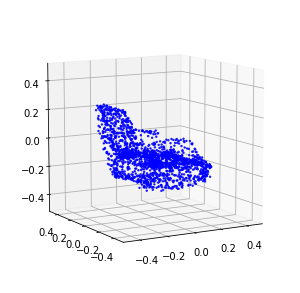

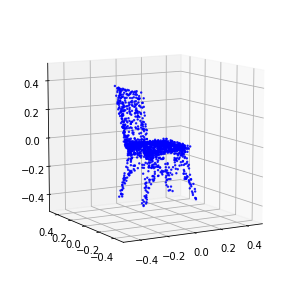

1901 (-0.02306434093448131, 0.22156889995803003) 47.5421969891
1902 (-0.020866781894279565, 0.25348320603370667) 48.1791460514
1903 (-0.021826179042134596, 0.24654974432095236) 49.1650760174
1904 (-0.021403439885572247, 0.2358576765526896) 49.0852880478
1905 (-0.02226924866275943, 0.2290056049823761) 49.5509810448
1906 (-0.021555701930723762, 0.25879441590412805) 49.8166241646
1907 (-0.02271775608153447, 0.2635284947312396) 48.2958369255
1908 (-0.02248132470995188, 0.2701332070257353) 49.5825111866
1909 (-0.023373565604181395, 0.2575342726448308) 49.9665400982
1910 (-0.022056302533525488, 0.2624778857697611) 47.8947792053
1911 (-0.022093354659559934, 0.24494165506051935) 48.5036020279
1912 (-0.022178879659622907, 0.26450874688832654) 48.5434160233
1913 (-0.022688397943325663, 0.26901958623658057) 47.9345319271
1914 (-0.022680388783793085, 0.23480694449466208) 47.4942090511
1915 (-0.02161673428895681, 0.24732952532560928) 48.7109158039
1916 (-0.02270455711075793, 0.259748707646909) 48.9

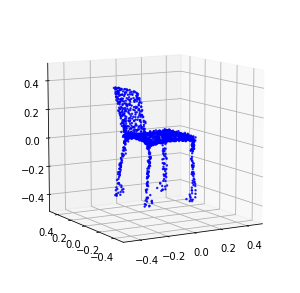

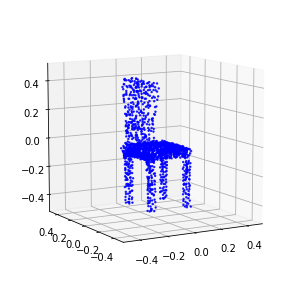

In [26]:
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

if do_training:
    for _ in range(max_epochs):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params)
        epoch = int(gan.sess.run(gan.increment_epoch))            
        print epoch, loss, duration
        
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=epoch)
            
        if epoch in save_synthetic_samples:
            syn_data = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_data)
            np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)
            for k in range(2):
                Point_Cloud(syn_data[k]).plot()
        train_stats.append((epoch,) + loss)

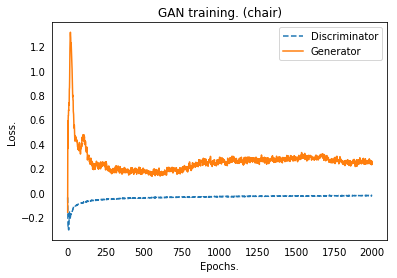

In [27]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.title('GAN training. (%s)' %(class_name))
    plt.legend(['Discriminator', 'Generator'], loc=0)
    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')